In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gpy
import folium
import ruptures as rpt

In [3]:
df = pd.read_csv('NYC_subway_traffic_2017-2021.csv')
df

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,5 Av/53 St,R015,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0
4589376,114,2021-08-13 20:00:00,5 Av/59 St,R079,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0
4589377,310,2021-08-13 20:00:00,Fulton St,R028,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0
4589378,311,2021-08-13 20:00:00,Fulton St,R028,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0


In [4]:
new_df = df.copy()
new_df = new_df[['Unique ID','Datetime','Structure','Borough','Neighborhood','Entries','Exits']]
new_df

,Unique ID,Datetime,Structure,Borough,Neighborhood,Entries,Exits
0,1,2017-02-04 04:00:00,Subway,M,East Harlem,403.0,222.0
1,2,2017-02-04 04:00:00,Subway,M,Upper West Side,119.0,145.0
2,3,2017-02-04 04:00:00,Subway,M,Upper West Side,55.0,81.0
3,10,2017-02-04 04:00:00,Elevated,Q,South Ozone Park/Howard Beach,156.0,30.0
4,11,2017-02-04 04:00:00,Subway,M,East Harlem,495.0,303.0
...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,Subway,M,Clinton/Chelsea,1182.0,646.0
4589376,114,2021-08-13 20:00:00,Subway,M,Upper West Side,1274.0,445.0
4589377,310,2021-08-13 20:00:00,Subway,M,Financial District,433.0,549.0
4589378,311,2021-08-13 20:00:00,Subway,M,Financial District,491.0,844.0


In [5]:
new_df['Datetime'] = pd.to_datetime(new_df['Datetime'])
new_df['Datetime_formatted'] = new_df['Datetime'].dt.strftime('%Y-%m-%d %H')
new_df['Datetime_formatted'] = pd.to_datetime(new_df['Datetime_formatted'])
# new_df.drop(columns=['Datetime'], inplace=True)
new_df['Year'] = new_df['Datetime_formatted'].dt.year
new_df['Month'] = new_df['Datetime_formatted'].dt.month
new_df['Day'] = new_df['Datetime_formatted'].dt.day
new_df['Hour'] = new_df['Datetime_formatted'].dt.hour

filtered_df = new_df.copy()
filtered_df

,Unique ID,Datetime,Structure,Borough,Neighborhood,Entries,Exits,Datetime_formatted,Year,Month,Day,Hour
0,1,2017-02-04 04:00:00,Subway,M,East Harlem,403.0,222.0,2017-02-04 04:00:00,2017,2,4,4
1,2,2017-02-04 04:00:00,Subway,M,Upper West Side,119.0,145.0,2017-02-04 04:00:00,2017,2,4,4
2,3,2017-02-04 04:00:00,Subway,M,Upper West Side,55.0,81.0,2017-02-04 04:00:00,2017,2,4,4
3,10,2017-02-04 04:00:00,Elevated,Q,South Ozone Park/Howard Beach,156.0,30.0,2017-02-04 04:00:00,2017,2,4,4
4,11,2017-02-04 04:00:00,Subway,M,East Harlem,495.0,303.0,2017-02-04 04:00:00,2017,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,Subway,M,Clinton/Chelsea,1182.0,646.0,2021-08-13 20:00:00,2021,8,13,20
4589376,114,2021-08-13 20:00:00,Subway,M,Upper West Side,1274.0,445.0,2021-08-13 20:00:00,2021,8,13,20
4589377,310,2021-08-13 20:00:00,Subway,M,Financial District,433.0,549.0,2021-08-13 20:00:00,2021,8,13,20
4589378,311,2021-08-13 20:00:00,Subway,M,Financial District,491.0,844.0,2021-08-13 20:00:00,2021,8,13,20


In [6]:
filtered_df.loc[:, 'Total'] = filtered_df['Entries'] + filtered_df['Exits']
filtered_df.loc[:, 'Netflow'] = filtered_df['Entries'] - filtered_df['Exits']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

,Unique ID,Datetime,Structure,Borough,Neighborhood,Entries,Exits,Datetime_formatted,Year,Month,Day,Hour,Total,Netflow
0,1,2017-02-04 04:00:00,Subway,M,East Harlem,403.0,222.0,2017-02-04 04:00:00,2017,2,4,4,625.0,181.0
1,2,2017-02-04 04:00:00,Subway,M,Upper West Side,119.0,145.0,2017-02-04 04:00:00,2017,2,4,4,264.0,-26.0
2,3,2017-02-04 04:00:00,Subway,M,Upper West Side,55.0,81.0,2017-02-04 04:00:00,2017,2,4,4,136.0,-26.0
3,10,2017-02-04 04:00:00,Elevated,Q,South Ozone Park/Howard Beach,156.0,30.0,2017-02-04 04:00:00,2017,2,4,4,186.0,126.0
4,11,2017-02-04 04:00:00,Subway,M,East Harlem,495.0,303.0,2017-02-04 04:00:00,2017,2,4,4,798.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,Subway,M,Clinton/Chelsea,1182.0,646.0,2021-08-13 20:00:00,2021,8,13,20,1828.0,536.0
4589376,114,2021-08-13 20:00:00,Subway,M,Upper West Side,1274.0,445.0,2021-08-13 20:00:00,2021,8,13,20,1719.0,829.0
4589377,310,2021-08-13 20:00:00,Subway,M,Financial District,433.0,549.0,2021-08-13 20:00:00,2021,8,13,20,982.0,-116.0
4589378,311,2021-08-13 20:00:00,Subway,M,Financial District,491.0,844.0,2021-08-13 20:00:00,2021,8,13,20,1335.0,-353.0


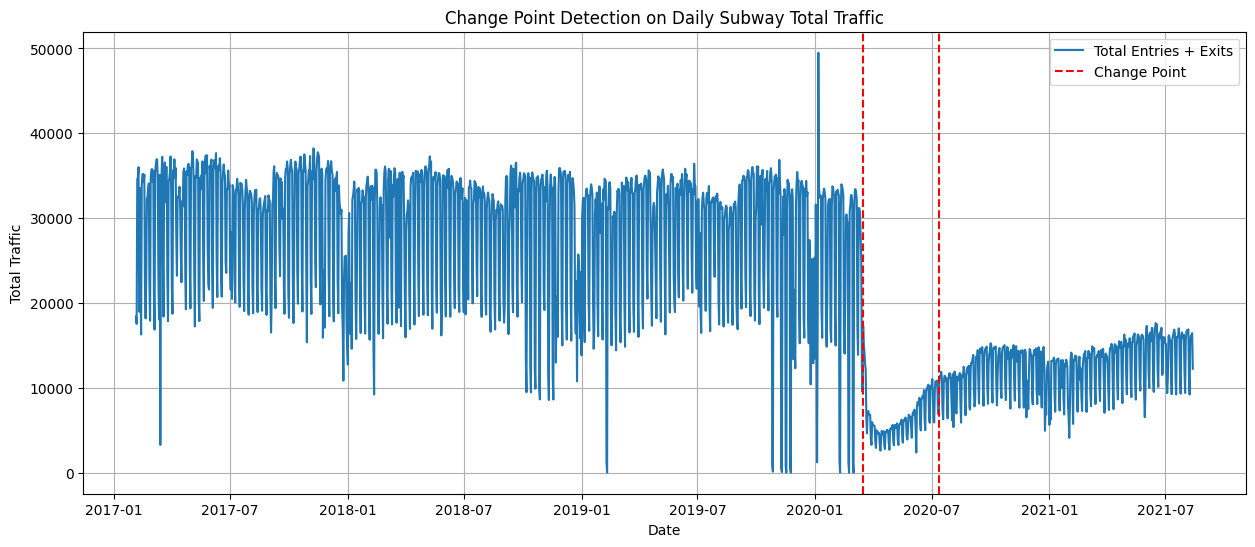

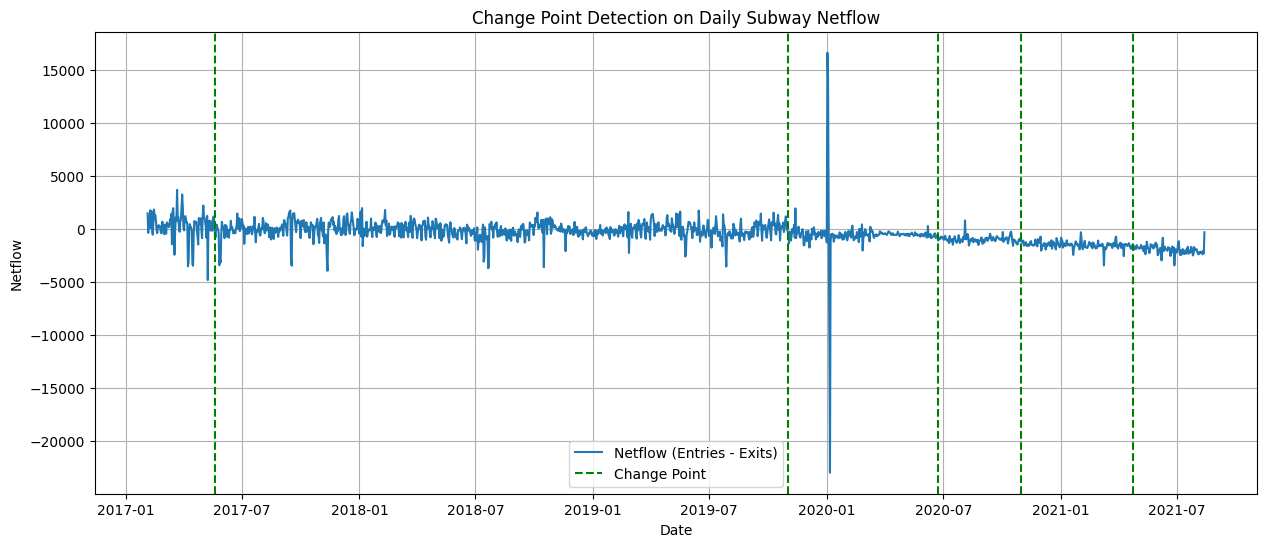

In [ ]:
# for structure = 'Elevated', 'Subway', 'At Grade', 'Open Cut', 'Viaduct'
# for borough = 'M' , 'B', 'Q', 'S', 'R', 'X'

# Filtering functions
def filter_by_column(df, column_name, value):
    filtered_df = df[df[column_name] == value].copy()
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

# Aggregation function with dynamic grouping
def aggregate_daily_traffic(df, group_col='Structure'):
    daily_df = df.groupby(['Year', 'Month', 'Day', group_col]).agg({
        'Total': 'sum',
        'Netflow': 'sum'
    }).reset_index()

    daily_df['Date'] = pd.to_datetime(daily_df[['Year', 'Month', 'Day']])
    daily_df = daily_df.sort_values('Date').reset_index(drop=True)
    return daily_df

# Aggregate by desired grouping column (e.g., 'Structure', 'Borough', 'Neighborhood', etc.)
grouping_column = 'Unique ID'  # change this as needed
daily_df = aggregate_daily_traffic(filtered_df, group_col=grouping_column)

# Filter the aggregated dataframe by a specific value in the grouping column
filter_value = 258  # change this as needed
filtered_daily_df = filter_by_column(daily_df, grouping_column, filter_value)

# Extract signals for analysis
signal_total = filtered_daily_df['Total'].values
signal_netflow = filtered_daily_df['Netflow'].values

# Define the model and penalty
model = "rbf"
penalty = 10

# Change point detection for Total traffic
algo_total = rpt.Pelt(model=model).fit(signal_total)
result_total = algo_total.predict(pen=penalty)

# Change point detection for Netflow
algo_netflow = rpt.Pelt(model=model).fit(signal_netflow)
result_netflow = algo_netflow.predict(pen=penalty)

# Plot Total Traffic with change points
plt.figure(figsize=(15,6))
plt.plot(filtered_daily_df['Date'], signal_total, label='Total Entries + Exits')
for i, cp in enumerate(result_total[:-1]):  # exclude last point which is end of series
    plt.axvline(filtered_daily_df['Date'].iloc[cp], color='r', linestyle='--', 
                label='Change Point' if i == 0 else "")
plt.title('Change Point Detection on Daily Subway Total Traffic')
plt.xlabel('Date')
plt.ylabel('Total Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Plot Netflow with change points
plt.figure(figsize=(15,6))
plt.plot(filtered_daily_df['Date'], signal_netflow, label='Netflow (Entries - Exits)')
for i, cp in enumerate(result_netflow[:-1]):
    plt.axvline(filtered_daily_df['Date'].iloc[cp], color='g', linestyle='--', 
                label='Change Point' if i == 0 else "")
plt.title('Change Point Detection on Daily Subway Netflow')
plt.xlabel('Date')
plt.ylabel('Netflow')
plt.legend()
plt.grid(True)
plt.show()



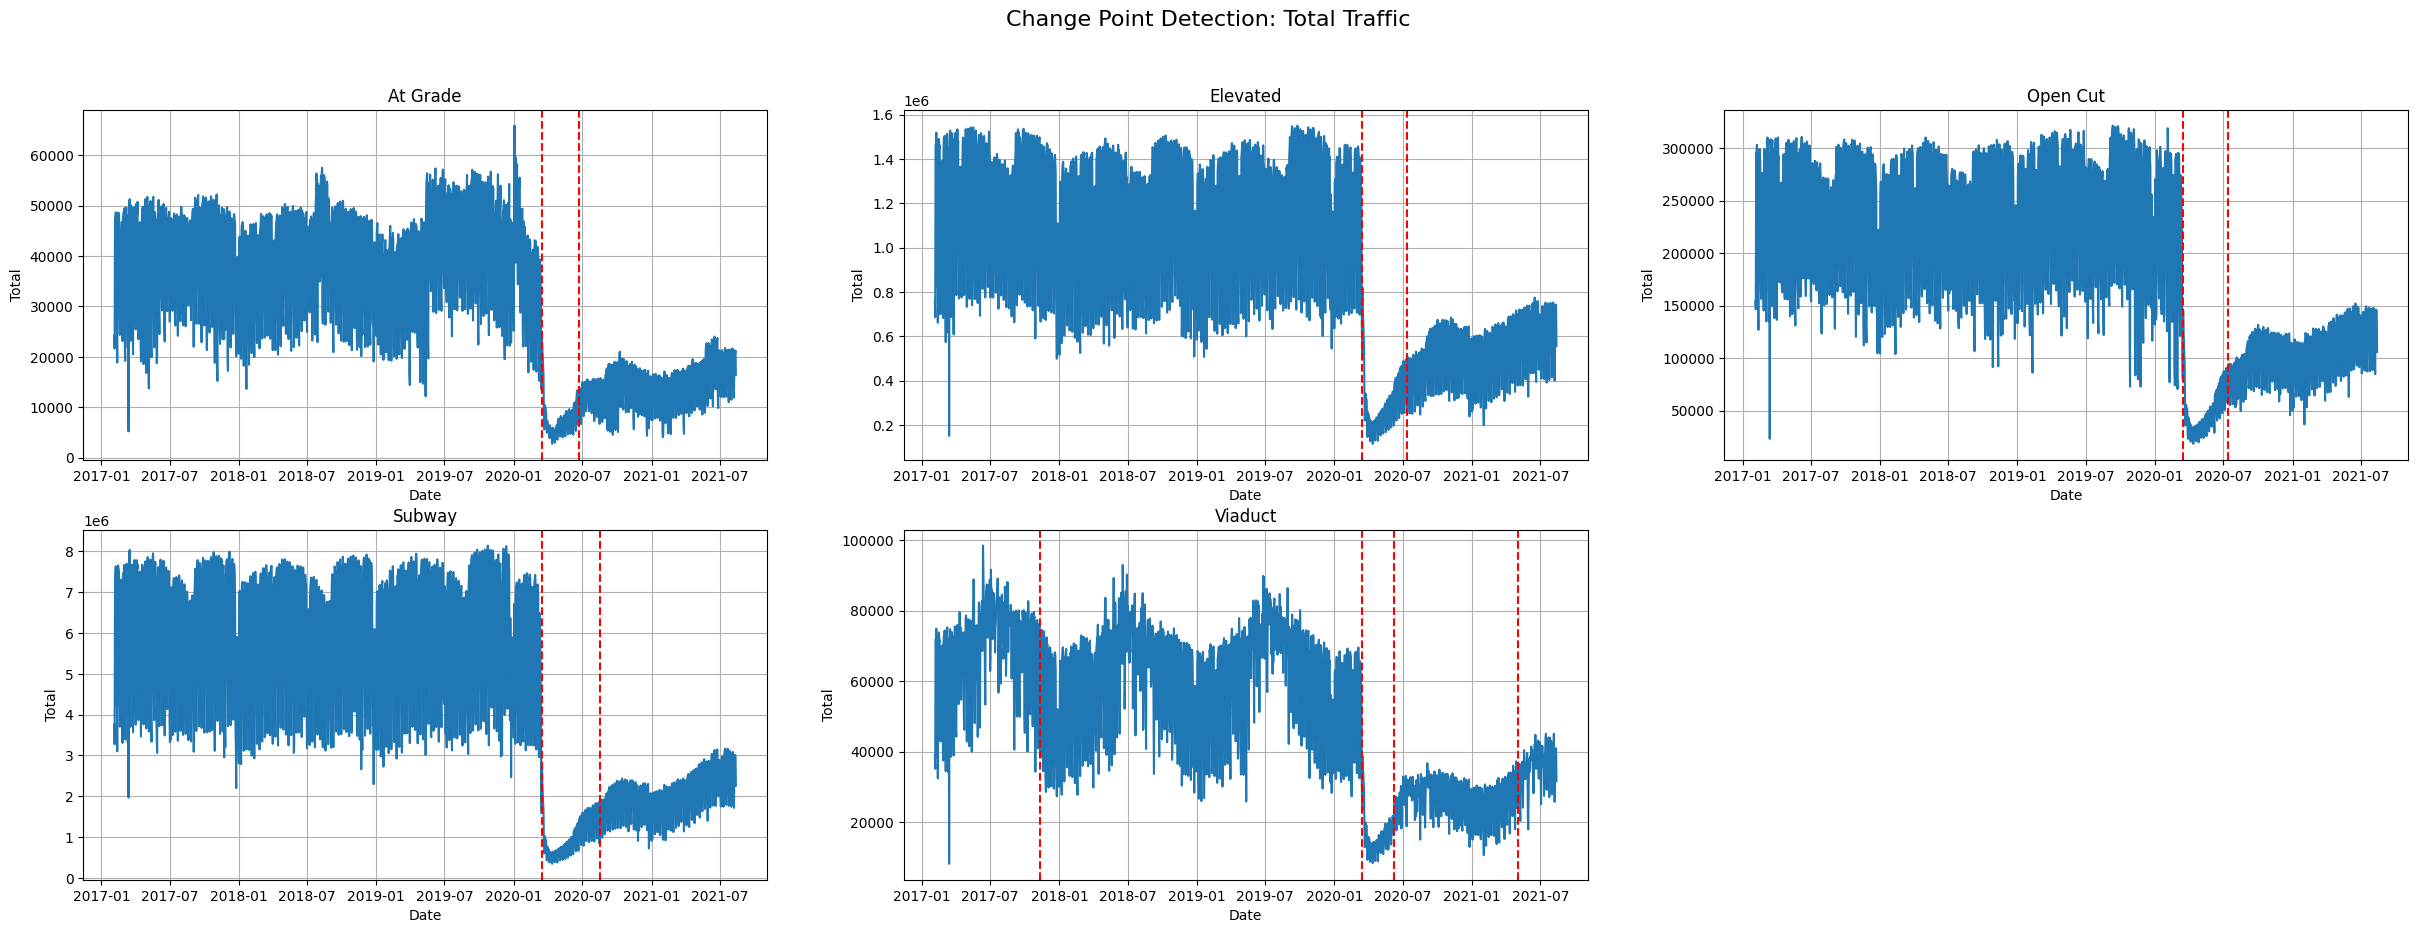

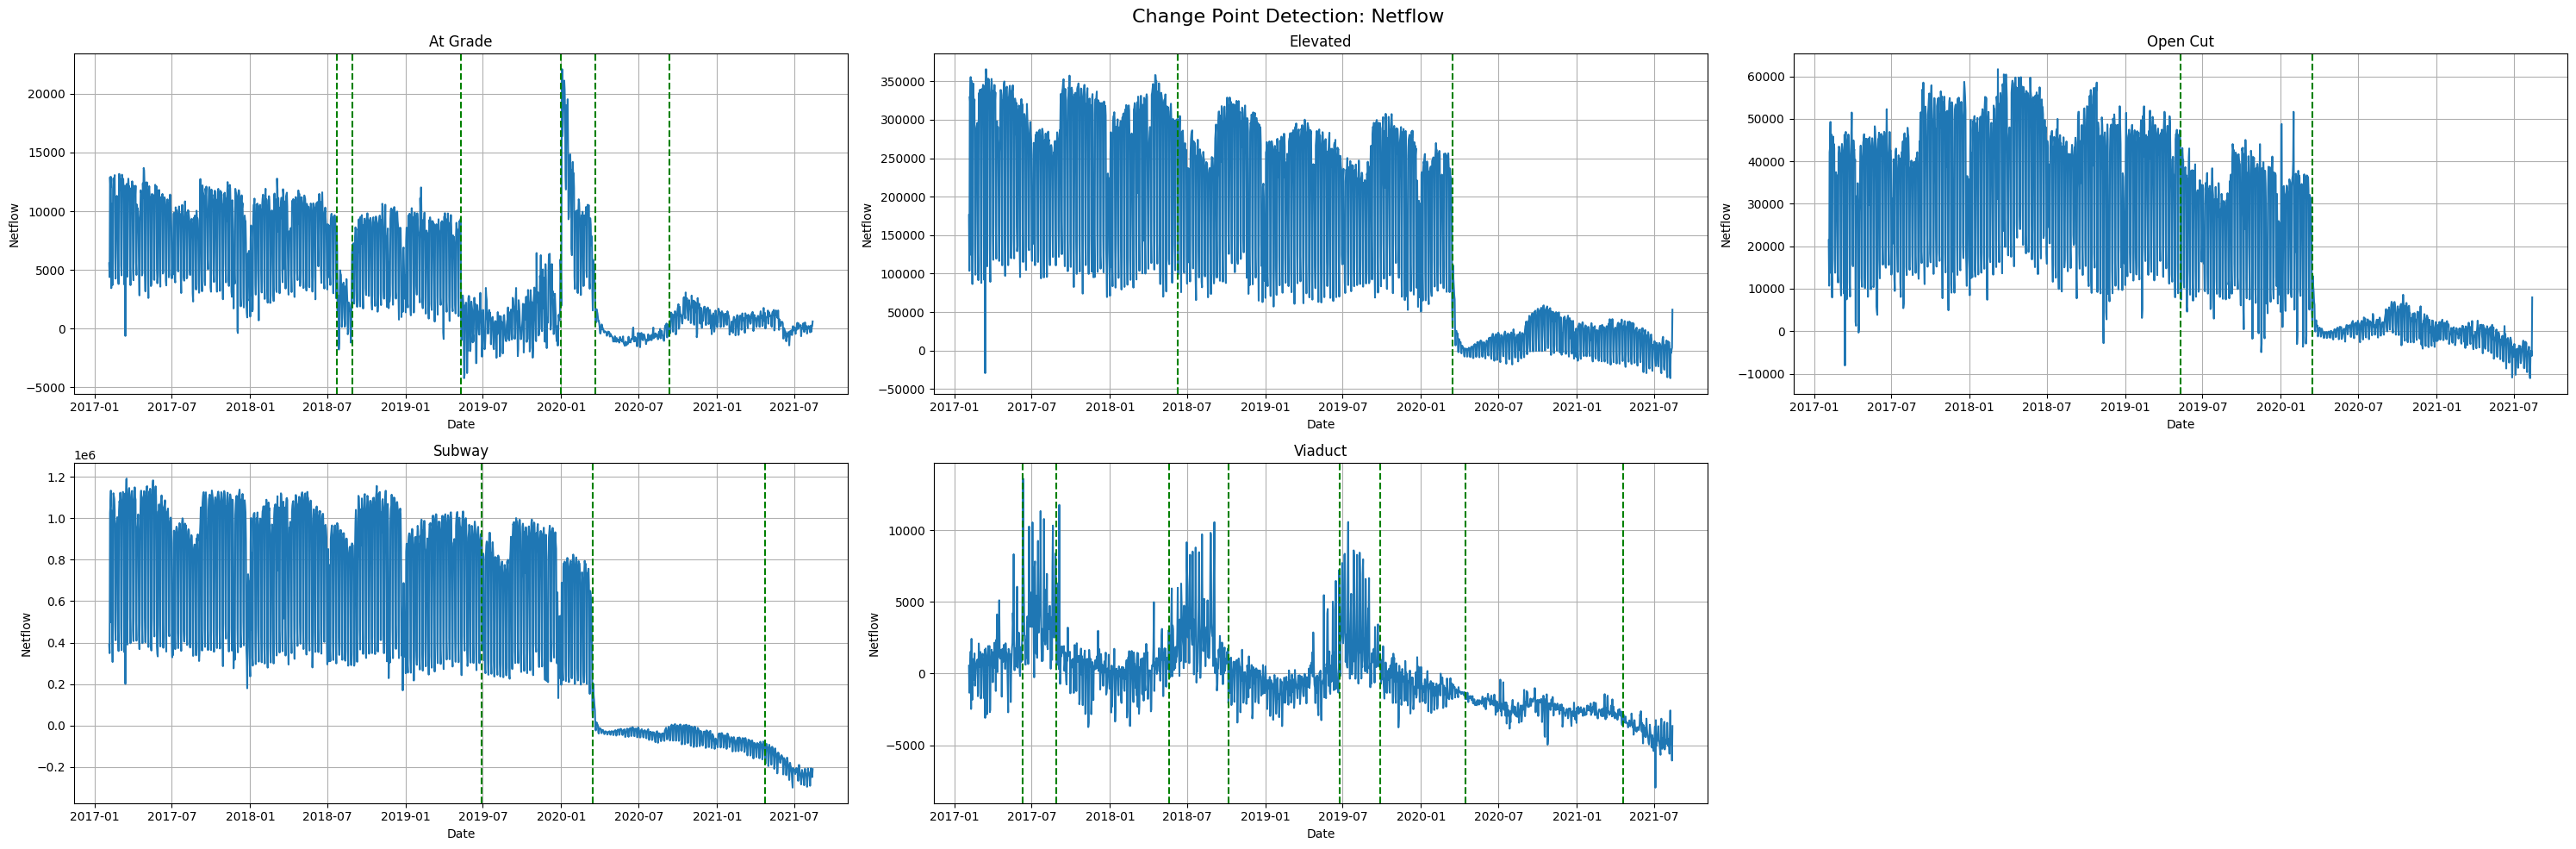

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np

# Filtering and aggregation
def aggregate_daily_traffic(df, group_col='Structure'):
    daily_df = df.groupby(['Year', 'Month', 'Day', group_col]).agg({
        'Total': 'sum',
        'Netflow': 'sum'
    }).reset_index()
    daily_df['Date'] = pd.to_datetime(daily_df[['Year', 'Month', 'Day']])
    daily_df = daily_df.sort_values('Date').reset_index(drop=True)
    return daily_df

def filter_by_column(df, column_name, value):
    return df[df[column_name] == value].copy().reset_index(drop=True)

# --- MAIN PIPELINE ---
# Auto-detect unique structure types
grouping_column = 'Structure'
daily_df = aggregate_daily_traffic(filtered_df, group_col=grouping_column)
structure_types = daily_df[grouping_column].unique()

# Subplot setup
num_structures = len(structure_types)
fig_total, axs_total = plt.subplots(nrows=2, ncols=int(np.ceil(num_structures / 2)), figsize=(30, 10))
fig_total.suptitle('Change Point Detection: Total Traffic', fontsize=16)

fig_net, axs_net = plt.subplots(nrows=2, ncols=int(np.ceil(num_structures / 2)), figsize=(30, 10))
fig_net.suptitle('Change Point Detection: Netflow', fontsize=16)

axs_total = axs_total.flatten()
axs_net = axs_net.flatten()

# Loop through each structure type
for idx, structure in enumerate(structure_types):
    filtered_daily_df = filter_by_column(daily_df, grouping_column, structure)
    if len(filtered_daily_df) < 10:
        continue  # too little data for analysis

    signal_total = filtered_daily_df['Total'].values
    signal_netflow = filtered_daily_df['Netflow'].values

    # Change point detection
    model = "rbf"
    penalty = 10

    try:
        result_total = rpt.Pelt(model=model).fit(signal_total).predict(pen=penalty)
        result_netflow = rpt.Pelt(model=model).fit(signal_netflow).predict(pen=penalty)
    except Exception as e:
        print(f"Skipping {structure} due to error: {e}")
        continue

    # --- Plot Total ---
    ax_total = axs_total[idx]
    ax_total.plot(filtered_daily_df['Date'], signal_total, label='Total Traffic')
    for i, cp in enumerate(result_total[:-1]):
        ax_total.axvline(filtered_daily_df['Date'].iloc[cp], color='red', linestyle='--')
    ax_total.set_title(structure)
    ax_total.set_xlabel('Date')
    ax_total.set_ylabel('Total')
    ax_total.grid(True)

    # --- Plot Netflow ---
    ax_net = axs_net[idx]
    ax_net.plot(filtered_daily_df['Date'], signal_netflow, label='Netflow')
    for i, cp in enumerate(result_netflow[:-1]):
        ax_net.axvline(filtered_daily_df['Date'].iloc[cp], color='green', linestyle='--')
    ax_net.set_title(structure)
    ax_net.set_xlabel('Date')
    ax_net.set_ylabel('Netflow')
    ax_net.grid(True)

# Hide unused axes
for j in range(idx + 1, len(axs_total)):
    axs_total[j].axis('off')
    axs_net[j].axis('off')

plt.tight_layout()
plt.show()


In [9]:
# Between two dates
start_date = '2020-03-14'
end_date = '2020-03-15'

before_covid = filtered_df[(filtered_df['Datetime'] <= start_date)]
after_covid = filtered_df[(filtered_df['Datetime'] >= end_date)]
after_covid.reset_index(drop=True, inplace=True)


In [10]:
# Group before_covid by Borough and sum Entries and Exits
before_grouped = before_covid.groupby('Borough')[['Entries', 'Exits']].sum().reset_index()
before_grouped['Period'] = 'Before COVID'

# Group after_covid by Borough and sum Entries and Exits
after_grouped = after_covid.groupby('Borough')[['Entries', 'Exits']].sum().reset_index()
after_grouped['Period'] = 'After COVID'

# Combine both for comparison
combined_grouped = pd.concat([before_grouped, after_grouped])


/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_68733/977528937.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted, x='Borough', y='Count', hue='Period', ci=None, palette='muted')


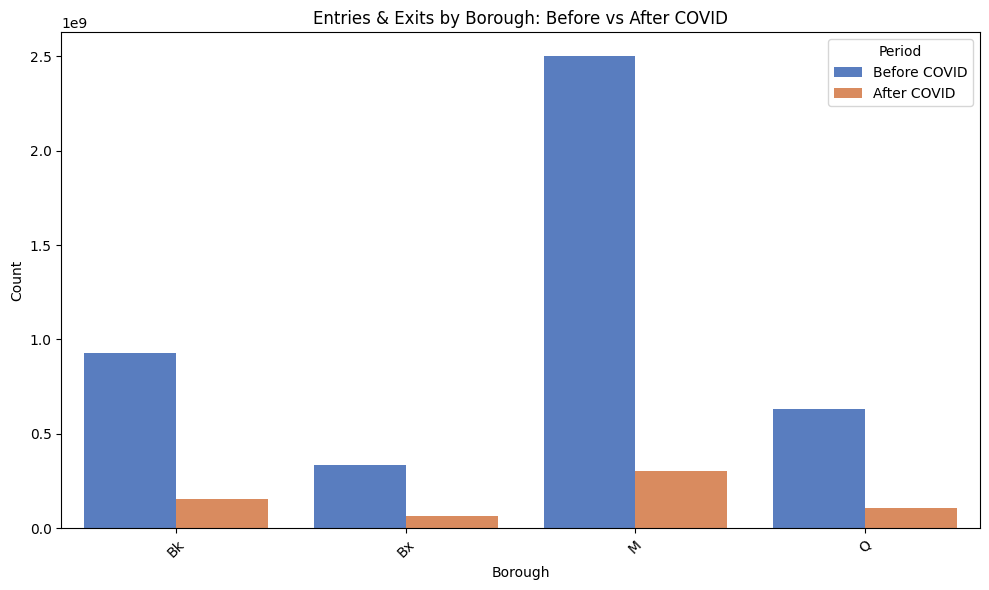

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt for plotting
melted = combined_grouped.melt(id_vars=['Borough', 'Period'], value_vars=['Entries', 'Exits'], var_name='Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Borough', y='Count', hue='Period', ci=None, palette='muted')
plt.title('Entries & Exits by Borough: Before vs After COVID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Focus on Borough 'M' (or any other)
before_m = before_covid[before_covid['Borough'] == 'M'].copy()
after_m = after_covid[after_covid['Borough'] == 'M'].copy()

# Ensure datetime is datetime type
before_m['Datetime'] = pd.to_datetime(before_m['Datetime'])
after_m['Datetime'] = pd.to_datetime(after_m['Datetime'])

# Create Total column
before_m['Total'] = before_m['Entries'] + before_m['Exits']
after_m['Total'] = after_m['Entries'] + after_m['Exits']

# Group by day
before_daily = before_m.groupby(before_m['Datetime'].dt.date)['Total'].sum()
after_daily = after_m.groupby(after_m['Datetime'].dt.date)['Total'].sum()

# Convert index to datetime
before_daily.index = pd.to_datetime(before_daily.index)
after_daily.index = pd.to_datetime(after_daily.index)

# Ensure daily frequency
before_daily = before_daily.asfreq('D').fillna(0)
after_daily = after_daily.asfreq('D').fillna(0)


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (you can tune p,d,q based on AIC or ACF/PACF)
model = ARIMA(before_daily, order=(2, 1, 2))  # (p,d,q)
model_fit = model.fit()

# Summary (optional)
print(model_fit.summary())


/Users/sgurung/Desktop/Concept Drift in Data Science/Project/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sgurung/Desktop/Concept Drift in Data Science/Project/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 1135
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17301.257
Date:                Thu, 22 May 2025   AIC                          34612.514
Time:                        20:05:40   BIC                          34637.682
Sample:                    02-04-2017   HQIC                         34622.021
                         - 03-14-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0365      0.017     59.613      0.000       1.002       1.071
ar.L2         -0.7200      0.017    -42.358      0.000      -0.753      -0.687
ma.L1         -1.5478      0.023    -66.449      0.0

In [14]:
# Forecast as many days as in after_covid
n_days = len(after_daily)
forecast = model_fit.forecast(steps=n_days)
forecast.index = after_daily.index  # Align index


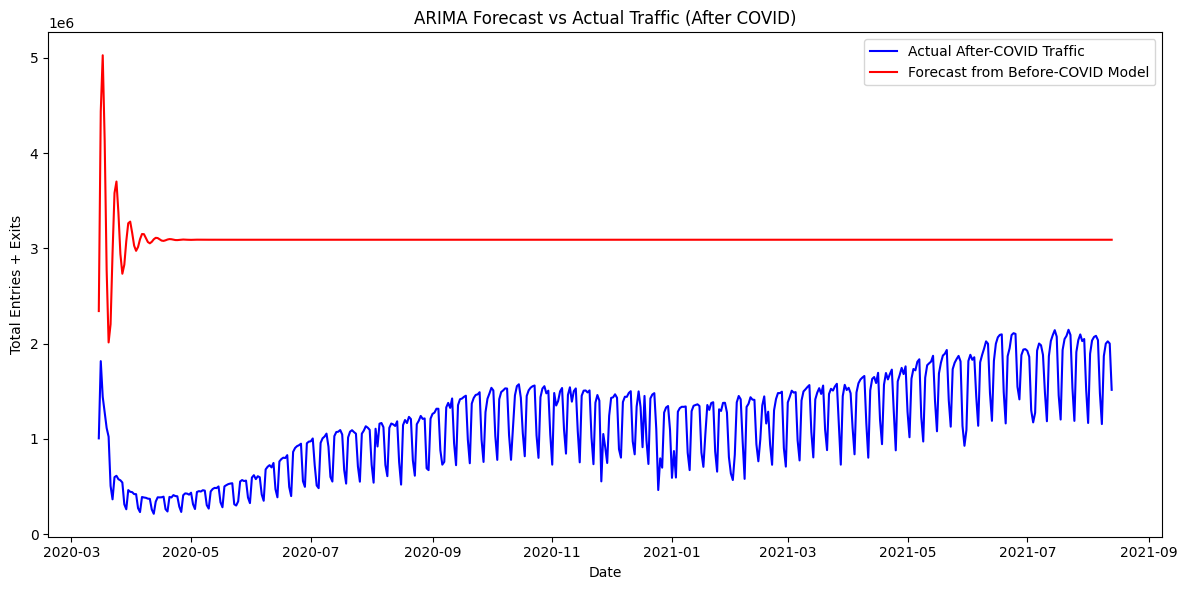

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(after_daily, label='Actual After-COVID Traffic', color='blue')
plt.plot(forecast, label='Forecast from Before-COVID Model', color='red')
plt.title('ARIMA Forecast vs Actual Traffic (After COVID)')
plt.xlabel('Date')
plt.ylabel('Total Entries + Exits')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(after_daily, forecast)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 3968531034045.15
